# Week 13:  Object-oriented programming HW

## Exercise 1  (from Monday's class)

1. Write a ``Particle`` class that can be used to represent a particle with a mass, a 3-d position, and a 3-d velocity.

2. Write a method that can be used to compute the kinetic energy of the particle

3. Write a method that takes another particle as an argument and finds the distance between the two particles

4. Write a method that given a time interval ``dt`` will update the position of the particle to the new position based on the current position and velocity.

5. Write a ``ChargedParticle`` class that inherits from the ``Particle`` class, but also has an attribute for the charge of the particle.


In [1]:
from matplotlib import pyplot as plt
from pylab import plot,xlabel,ylabel,show
import numpy as np

class particle(object):
    def __init__(self, m, x, y, z, vx, vy, vz):
        self.m=m
        self.x=x
        self.y=y
        self.z=z
        self.vx=vx
        self.vy=vy
        self.vz=vz
    def kinetic_energy(p):
        return (.5*p.m*((p.vx**2)+(p.vy**2)+(p.vz**2)))
    def separation(p1,p2):
        return np.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2 + (p1.z - p2.z)**2)
    def new_pos_return(self, dt):
        self.x=(self.x+(self.vx*dt))
        self.y=(self.y+(self.vy*dt))
        self.z=(self.z+(self.vz*dt))
        return(self.x, self.y, self.z)
    def new_pos(self, dt):
        self.x=(self.x+(self.vx*dt))
        self.y=(self.y+(self.vy*dt))
        self.z=(self.z+(self.vz*dt))

class charged_particle(particle):

    def __init__(self, m, x, y, z, vx, vy, vz, ch):
        self.m = m
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.ch = ch
    def separation(self,other):
        d = np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2 + (self.z - other.z)**2)
        if d<=.25:
            print('interaction')
            if ((self.ch>0 and other.ch<0) or (self.ch<0 and other.ch>0)):
                self.ch=0
                self.vx=0
                self.vy=0
                self.vz=0
                other.ch=0
                other.vx=0
                other.vy=0
                other.vz=0
                print('merge')
            else:
                self.vx*=(-1*(self.ch+other.ch)*(self.m/other.m))
                self.vy*=(-1*(self.ch+other.ch)*(self.m/other.m))
                self.vz*=(-1*(self.ch+other.ch)*(self.m/other.m))
                other.vx*=(-1*(self.ch+other.ch)*(self.m/other.m))
                other.vy*=(-1*(self.ch+other.ch)*(self.m/other.m))
                other.vz*=(-1*(self.ch+other.ch)*(self.m/other.m))
                print('repel')
        else:
            return(d)   
    def graph_position(self,other): #instead of listing the values, I just graphed them in 3 dimensions
        #below are all of the lists that will be used for graphing
        sx_pos=[]
        sy_pos=[]
        sz_pos=[]
        ox_pos=[]
        oy_pos=[]
        oz_pos=[]
        t_data=[]
        for time in range(1,50): 
            if time>=0:
                #bellow is the speed changing for every time value, and position being appended to the respective list
                self.x+=(self.vx*.5)
                self.y+=(self.vy*.5)
                self.z+=(self.vz*.5)
                other.x+=(other.vx*.5)
                other.y+=(other.vy*.5)
                other.z+=(other.vz*.5)
                sx_pos.append(self.x)
                sy_pos.append(self.y)
                sz_pos.append(self.z)
                ox_pos.append(other.x)
                oy_pos.append(other.y)
                oz_pos.append(other.z)
                t_data.append(time)
            #below is the code for interactions, only difference is the break command if the particles merge
            d = np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2 + (self.z - other.z)**2)
            if d<=.25:
                if ((self.ch>0 and other.ch<0) or (self.ch<0 and other.ch>0)):
                    self.ch=0
                    self.vx=0
                    self.vy=0
                    self.vz=0
                    other.ch=0
                    other.vx=0
                    other.vy=0
                    other.vz=0
                    print('particles merged, both charges and velocities are now zero')
                    break
                else:
                    self.vx*=(-1*(self.ch+other.ch)*(self.m/other.m))
                    self.vy*=(-1*(self.ch+other.ch)*(self.m/other.m))
                    self.vz*=(-1*(self.ch+other.ch)*(self.m/other.m))
                    other.vx*=(-1*(self.ch+other.ch)*(self.m/other.m))
                    other.vy*=(-1*(self.ch+other.ch)*(self.m/other.m))
                    other.vz*=(-1*(self.ch+other.ch)*(self.m/other.m))
                    print('particles repelled, speed was the only property changed')
        #this is just everything for the 3d graph
        fig= plt.figure(figsize=(20,15))
        ax = plt.axes(projection='3d')
        image=ax.scatter3D(sx_pos, sy_pos, sz_pos, c=t_data, cmap='cool', s=250, marker='^', alpha=.5)
        image=ax.scatter3D(ox_pos, oy_pos, oz_pos, c=t_data, cmap='cool', s=250, marker='o', alpha=.5)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label('$time$',size=20)
        ax.set_xlabel("$X position$",size=20)
        ax.set_ylabel("$Y position$",size=20)
        ax.set_zlabel("$Z position$",size=20)

In [2]:
p1=charged_particle(5,-5,-5,-5,.5,.5,.5,.5)
p2=charged_particle(10,5,5,5,-.5,-.5,-.5,-.5)
p1.separation(p2)

17.320508075688775

## Exercise 2  (New)

6. Write a method that can be used to see if a particle is in the same place (e.g., find_seperation < 0.25).  If there are two ChargedParticles in the same place make a "simple" (not correct physics) "interaction". (__have the code print "interaction"__).   

    a. If the charges are opposite, make them "combine", set both velocities to zero and set their charge to zero, and print "merge".

    b. Else, make the particles "repel", to do:
    
        multiply each "self" velocity and  by (-1 * (self.charge+other.charge) * (self.mass/other.mass))  
    
        multiply each "other" velocity by (-1 * (self.charge+other.charge) * (other.mass/self.mass)) 
    
    e.g., reversing it's velocity, and print "repel". __(Again this is bad physics, but we are focusing on coding so play along.)__


7. To test the above, write a code with two particles starting:

        P1 at (x,y,z) = (-5,-5,-5) with (vx,vy,vz) = (1,1,1) and (charge = 0.5) 

        P2 at (x,y,z) = (5,5,5) with (vx,vy,vz) = (-1,-1,-1) and (charge = -0.5).  

    Use your dt time interval to move the particles in 0.5 time steps for 50 steps, and print the current poition and velocity of each particle at each time step.  
    

8. To test the above, write a code with two particles starting: 

        P1 at (x,y,z) = (5,5,5) with (vx,vy,vz) = (2,2,2) and (charge = 0.5) 

        P2 at (x,y,z) = (5,5,5) with (vx,vy,vz) = (-2,-2,-2) and (charge = 2.0).  

    Use your dt time interval to move the particles in 0.5 time steps for 50 steps, and print the current poition and velocity of each particle at each time step.  


In [3]:
p3=charged_particle(5,5,5,5,2,2,2,-.5)
p4=charged_particle(10,5,5,5,-2,-2,-2,2)
p3.separation(p4)

interaction
merge


particles merged, both charges and velocities are now zero


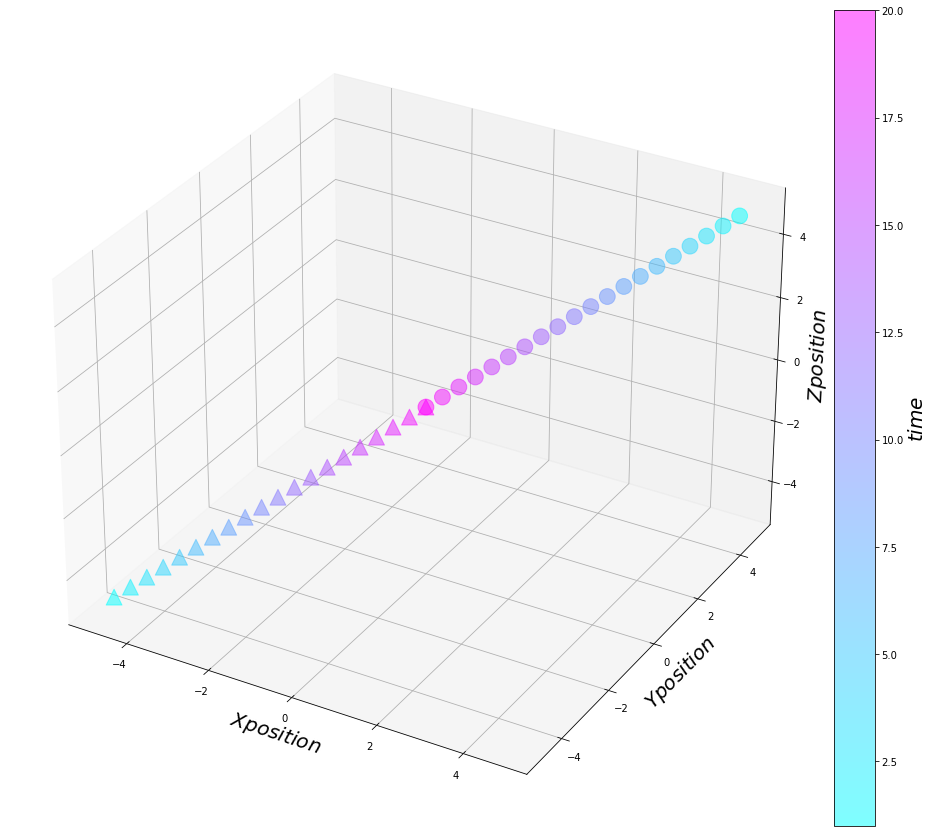

In [4]:
#this is an example of particles merging
p1.graph_position(p2)

particles repelled, speed was the only property changed


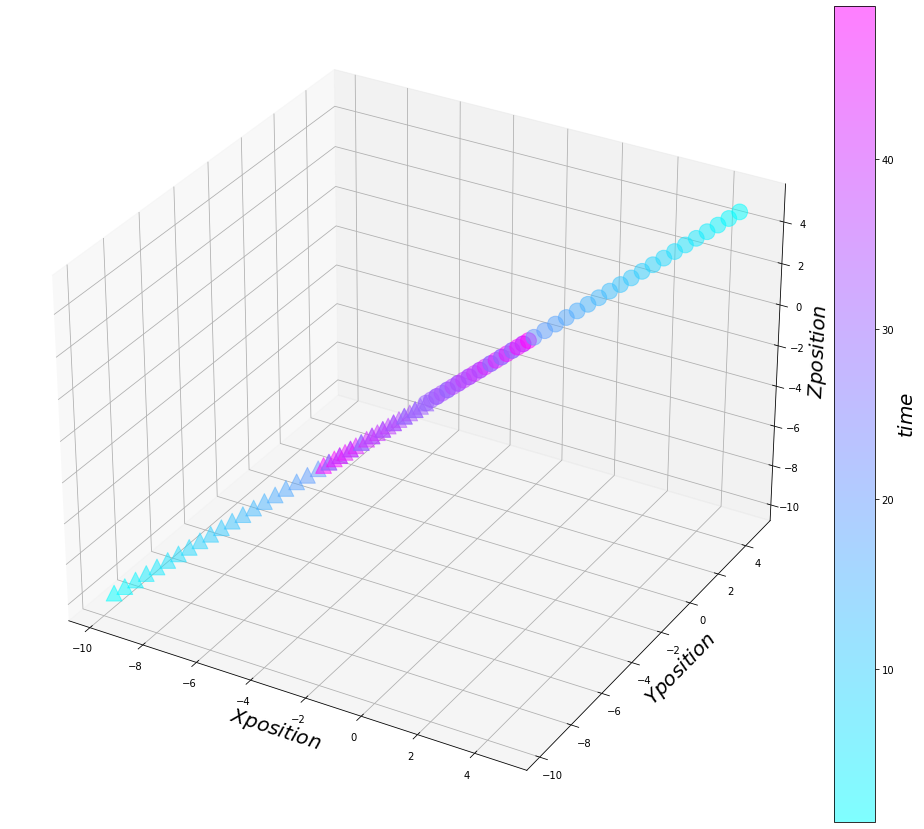

In [5]:
#this is an example of particles repelling each other
p5=charged_particle(5,-10,-10,-10,.5,.5,.5,.5)
p6=charged_particle(10,5,5,5,-.5,-.5,-.5,.5)
p5.graph_position(p6)

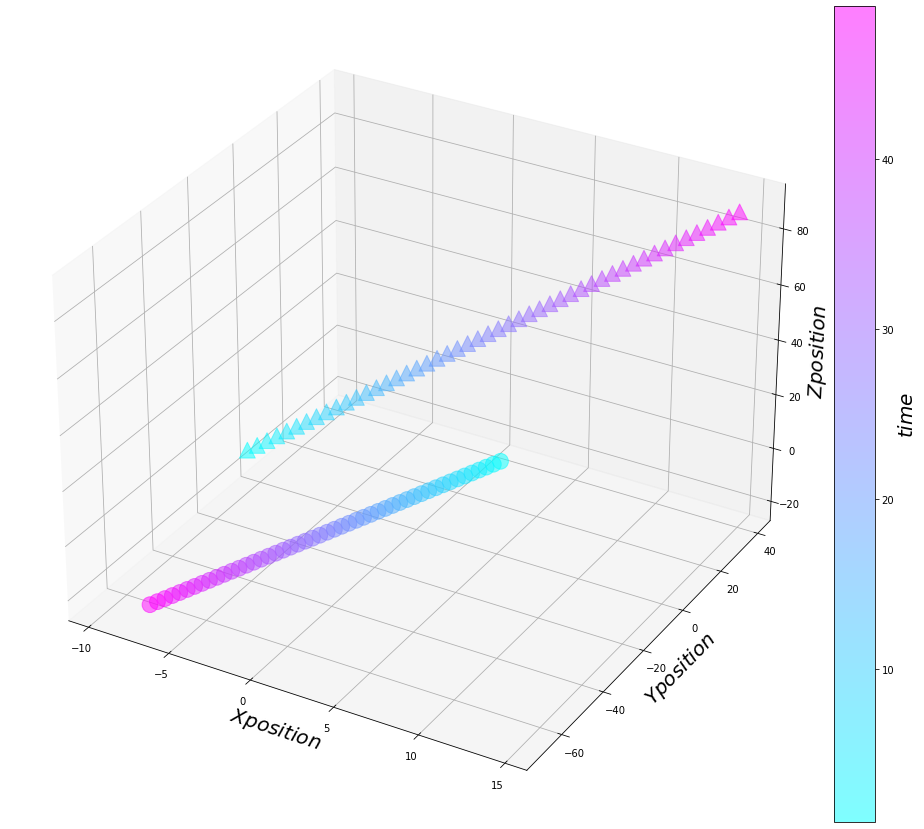

In [6]:
#this is an example of two particle that don't collide
p7=charged_particle(5,-10,-10,-10,1,2,4,.5)
p8=charged_particle(10,5,5,5,-.5,-3,-1,.5)
p7.graph_position(p8) 